<h1 style="font-size:30px;">Basic Image Manipulations</h1>

In this notebook we will cover pixels operations which include editing individual pixels and cropping images. We will also cover image transformations including resizing and flipping images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'


# 1. Pixel Operations

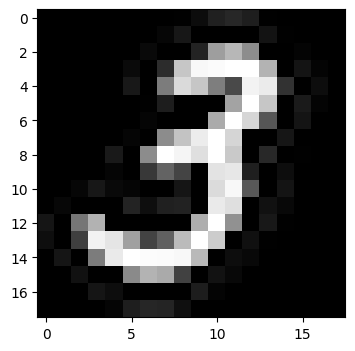

In [3]:
# Read image as grayscale.
mnist_3_img = cv2.imread('visuals/MNIST_3_18x18.png', cv2.IMREAD_GRAYSCALE)

# Display the image.
plt.figure(figsize = (4, 4))
plt.imshow(mnist_3_img);

## 1.1 Accessing Individual Pixels
To access pixels in a numPy array, you have to use matrix notation such as `matrix[r, c]`, where the `r` is the row number and `c` is the column number. Also note that the matrix is 0-indexed. For example, if you want to access pixel in the upper left corner of the image, you need to specify `matrix[0, 0]`. 

Let's take a look at accesing some of the pixels in the image above.

In [4]:
print(mnist_3_img[3, 10])
print(mnist_3_img[12, 2])
print(mnist_3_img[10, 12])

251
118
88


## 1.2 Modifying Image Pixels
We can modify the intensity values of pixels in the same manner as described above.

[[  0   0   0   0   0   0   0   0   1  12  33  39  30   1   0   0 150   0]
 [  0   0   0   0   0   0   0   6  23   0   0   0   0  19   1   0 150   0]
 [  0   0 100 125   0   0   9   0   0  35 158 183 141   0   0   4 150   0]
 [  0   0 150 175   0  10   0  44 198 248 251 255 255 179   0  20 150   0]
 [  0   0   0   0   0  24   0 124 218 198 126  74 243 235  50   0 150   0]
 [  0   0   0   0   0   0   1  29   0   0   0 163 255 198   0  26 150   0]
 [  0   0   0   0   0   0   5   0   0   0 171 255 214  86   0  20 150   0]
 [  0   0   0   0   0   5   0 140 196 236 255 213   0   0  22   0 150   0]
 [  0   0   0   0  25   0 140 255 245 223 255 201   0  41   0   1 150   0]
 [  0   0   0   0   5   0  56  99  68   0 228 231  31   0  13   0 150   0]
 [  0   0   6  23   9   5   0   0  21   0 219 248  88   0  20   0 150   0]
 [  0   7   0   0   0  35  14  33  34   0 234 223   0  17   8   0 150   0]
 [ 21   0 118 178   0   0   0   0   0 174 255 145   0  24   1   0 150   0]
 [ 14   0  63 242 229 160

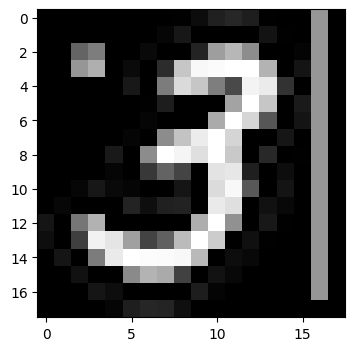

In [5]:
# Make a copy of the original image.
mnist_3_img_copy = mnist_3_img.copy()

# Modify four pixels.
mnist_3_img_copy[2, 2] = 100
mnist_3_img_copy[2, 3] = 125
mnist_3_img_copy[3, 2] = 150
mnist_3_img_copy[3, 3] = 175

# Use numPy array slicing to modify a group of pixels.
mnist_3_img_copy[0:17,16] = 150

# Print the image data.
print(mnist_3_img_copy)

# Display the modified image.
plt.figure(figsize = (4, 4))
plt.imshow(mnist_3_img_copy);

Notice that we have modified the pixles in the image in the upper left corner and also at the far right of the image.

# 2. Cropping Images

Cropping an image does not require a special function in OpenCV. It is achieved by selecting a specific (pixel) region of the image.

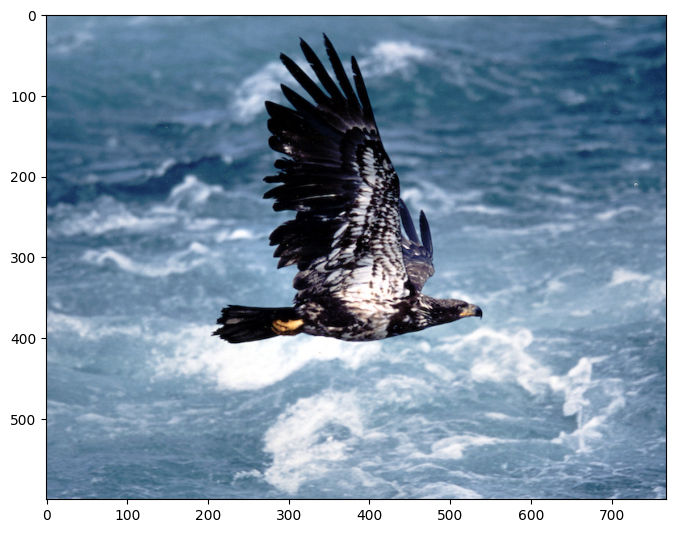

In [7]:
img_eagle = cv2.imread('visuals/Eagle_in_Flight.jpg', cv2.IMREAD_COLOR)

plt.figure(figsize = (8, 8))
plt.imshow(img_eagle[:, :, ::-1]);

### <font style="color:rgb(50,120,230)">Crop out the middle region of the image</font>

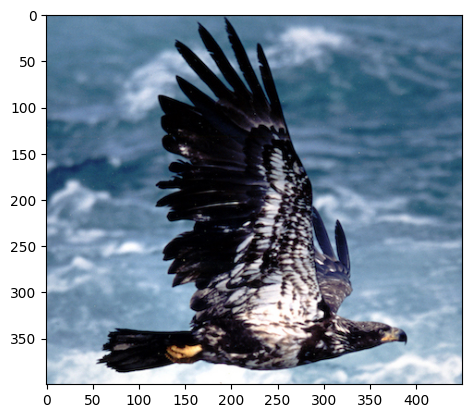

In [8]:
cropped_region = img_eagle[20:420, 150:600]
plt.imshow(cropped_region[:, :, ::-1]);

# 3. Resizing Images

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

The function **`resize()`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`, `dsize`, `fx`, and `fy`.

### <font color="green">Function Syntax </font>
``` python
dst = cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
```

`dst`: output image; it has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of `dst` is the same as of `src`.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis
2. `fy`: Scale factor along the vertical axis

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of `dst` is the same as of `src`. If `fx` and `fy` are specified then `dsize` should be set to `None` since is it a required argument.

### <font color="green">OpenCV Documentation</font>

[**`resize()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 3.1 Method 1: Specifying Scaling Factor using fx and fy


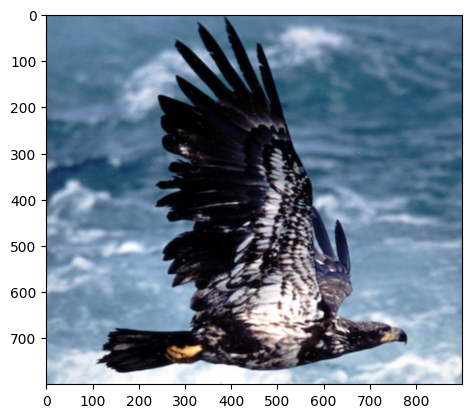

In [9]:
# Resize the image.
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx = 2, fy = 2)

# Display the resized image.
plt.imshow(resized_cropped_region_2x[:, :, ::-1]);

### <font style="color:rgb(50,120,230)">Display resized (2x) cropped region</font>

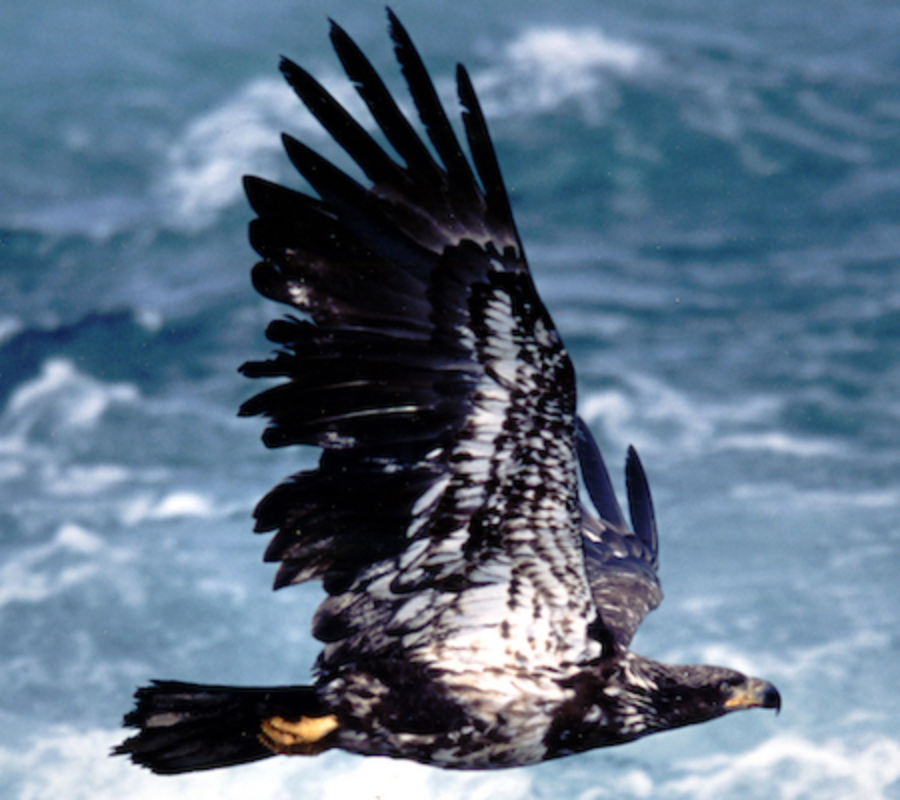

In [10]:
# Save resized image to the file system.
cv2.imwrite('visuals/resized_cropped_region_2x.png', resized_cropped_region_2x)

# Display the cropped and resized image.
Image(filename = 'visuals/resized_cropped_region_2x.png') 

## 3.2 Method 2: Specifying Exact Size of the Output Image

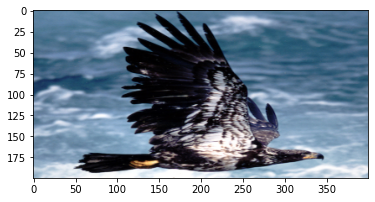

In [9]:
# Set the desired size of the image.
desired_width  = 400
desired_height = 200
dim = (desired_width, desired_height)

# Resize the image.
resized_cropped_region = cv2.resize(cropped_region, dsize = dim, interpolation = cv2.INTER_AREA)
plt.figure(figsize = (6, 6))
plt.imshow(resized_cropped_region[:, :, ::-1]);

## 3.3 Method 3: Resize Dimension while Maintaining Aspect Ratio

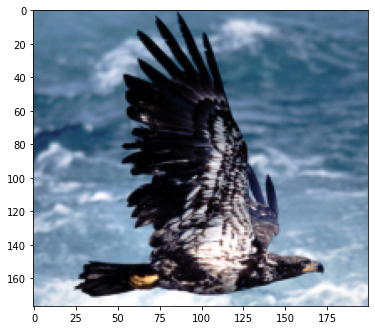

In [10]:
# Method 2: Using 'dsize'.
desired_width = 200
aspect_ratio = cropped_region.shape[0] / cropped_region.shape[1]
desired_height = int(desired_width * aspect_ratio)
dim = (desired_width, desired_height)

# Resize the image.
resized_cropped_region = cv2.resize(cropped_region, dsize = dim, interpolation = cv2.INTER_AREA)
plt.figure(figsize = (6, 6))
plt.imshow(resized_cropped_region[:, :, ::-1]);


# 4. Flipping Images

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

The function **`flip()`** flips the array in one of three different ways (row and column indices are 0-based):

### <font color="green">Function Syntax </font>
``` python
dst = cv2.flip(src, flipCode[, dst])

```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


### <font color="green">OpenCV Documentation</font>

[**`flip()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

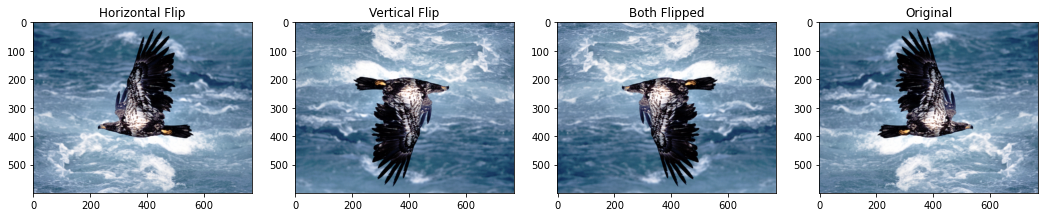

In [11]:
# Flip the image three ways.
img_eagle_flipped_horz = cv2.flip(img_eagle, 1)
img_eagle_flipped_vert = cv2.flip(img_eagle, 0)
img_eagle_flipped_both = cv2.flip(img_eagle, -1)

# Dispay the images.
plt.figure(figsize = [18, 5])
plt.subplot(141); plt.imshow(img_eagle_flipped_horz[:, :, ::-1]) 
plt.title('Horizontal Flip')
plt.subplot(142); plt.imshow(img_eagle_flipped_vert[:, :, ::-1])
plt.title('Vertical Flip')
plt.subplot(143); plt.imshow(img_eagle_flipped_both[:, :, ::-1]) 
plt.title('Both Flipped')
plt.subplot(144); plt.imshow(img_eagle[:, :, ::-1])            
plt.title('Original');

# 5. Exercise
Please complete the code in the cells below.

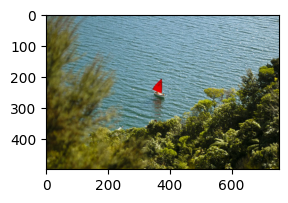

In [11]:
img = cv2.imread('visuals/New_Zealand_Boat.jpg', cv2.IMREAD_COLOR)
plt.figure(figsize=[3,3])
plt.imshow(img[:, :, ::-1]);

In [12]:
img.shape

(500, 753, 3)

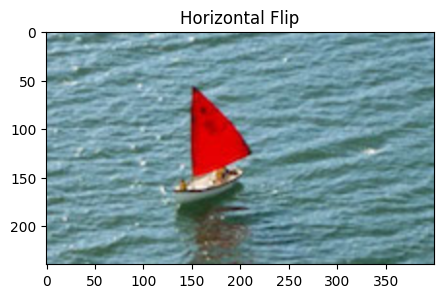

In [18]:
# Crop the image to extract the region around the sale boat.

#img[h, w] 
cropped_region = img[180:300, 250:450]

# Resize the image up by a factor of 2x.
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx = 2, fy = 2)

# Flip the cropped/resized image horizontally.
#horz -> code = 1  cv2.flip(img_eagle, 1)
#vert -> code = 0  cv2.flip(img_eagle, 0)
#both -> code = -1  cv2.flip(img_eagle, -1)

img_eagle_flipped_horz = cv2.flip(resized_cropped_region_2x, 1)

# Display the final result.
# YOUR CODE HERE
plt.figure(figsize = [5, 5])
plt.imshow(img_eagle_flipped_horz[:, :, ::-1]); plt.title('Horizontal Flip');

Your results should look similar to this.

![c0-m1-Canoe-Exercise-01-03.png](https://opencv.org/wp-content/uploads/2021/08/c0-m1-Canoe-Exercise-01-03.png)